# TP2_GROUPE-7: Neural_Network

# 

In [ ]:
# on commence par importer toutes les bibliotheques dont on aura besoin 
%pylab inline
import os
import numpy as np
import pandas as pd
from imageio import imread # pour effectuer les traitements sur les images 
from sklearn.metrics import accuracy_score # pour calculer les metriques en rapport avec le modele

import tensorflow as tf # qui est la bibliotheque qui contient keras 
import keras 

Populating the interactive namespace from numpy and matplotlib


C:\Users\EKH\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['seed', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
# on fixe une valeur de depart pour controler l'aleat du modele 
seed = 128
rng = np.random.RandomState(seed)

In [ ]:
train = pd.read_csv( 'train.csv')
test = pd.read_csv( 'Test.csv')

sample_submission = pd.read_csv('sample_submission.csv')

train.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


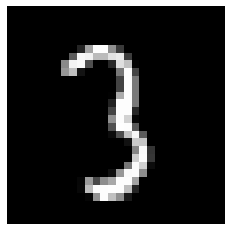

In [ ]:
img_name = rng.choice(train.filename)
filepath = os.path.join( 'Images', 'train', img_name)

img = imread(filepath, as_gray=True)

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
# lir l'ensemble des donnees et convrtire sous forme utilisable
temp = []
for img_name in train.filename:
    image_path = ('Images', 'train', img_name)
    img = imread(filepath, as_gray=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = ('Images', 'test', img_name)
    img = imread(filepath,as_gray=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')

In [ ]:
train_y = keras.utils.np_utils.to_categorical(train.label.values)

In [ ]:
split_size = int(train_x.shape[0]*0.7)

train_x, val_x = train_x[:split_size], train_x[split_size:]
train_y, val_y = train_y[:split_size], train_y[split_size:]

In [ ]:
train.label[split_size:]

34300    3
34301    1
34302    6
34303    8
34304    3
        ..
48995    2
48996    4
48997    9
48998    3
48999    0
Name: label, Length: 14700, dtype: int64

# 

# 2.Construction du modele

In [ ]:
# definir les variables 
input_num_units = 784
hidden_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

# importer les modules keras 

from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential([
  Dense(input_num_units, activation ='relu'),
  Dense(hidden_num_units, activation='relu'),
  Dense(output_num_units, activation = 'softmax')])
# teste de Modele
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#on affiche les donnees
validation_data =(val_x, val_y)
validation_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
trained_model = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 19s 43ms/step - loss: 2.3027 - accuracy: 0.1128 - val_loss: 2.3017 - val_accuracy: 0.1097
Epoch 2/5
268/268 [==============================] - 10s 38ms/step - loss: 2.3012 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 3/5
268/268 [==============================] - 10s 39ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 4/5
268/268 [==============================] - 12s 43ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 5/5
268/268 [==============================] - 11s 41ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097


# 

# Evaluation du modele

Prediction is:  [0 0 0 0 0 0 0 0 0 0]


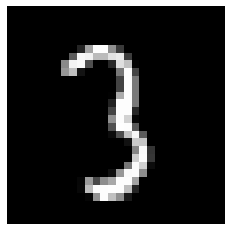

In [ ]:
pred = (model.predict(test_x))
pred = np.round(pred).astype(int)

#image_path = ('Images', 'train', img_name)
#img = imread(filepath, as_gray=True)


test_index = int(img_name.split('.')[0]) - train.shape[0]

print ("Prediction is: ", pred[test_index])

pylab.imshow(img, cmap='gray')
pylab.axis('off')
pylab.show()

In [ ]:
#on cree une soumission avec notre modele
sample_submission.filename = test.filename; 
sample_submission.label = pred
sample_submission.to_csv(index=False)

<ipython-input-21-12712049d197>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sample_submission.filename = test.filename;
<ipython-input-21-12712049d197>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  sample_submission.label = pred


'ImageId,Label\r\n1,0\r\n2,0\r\n3,0\r\n4,0\r\n5,0\r\n6,0\r\n7,0\r\n8,0\r\n9,0\r\n10,0\r\n11,0\r\n12,0\r\n13,0\r\n14,0\r\n15,0\r\n16,0\r\n17,0\r\n18,0\r\n19,0\r\n20,0\r\n21,0\r\n22,0\r\n23,0\r\n24,0\r\n25,0\r\n26,0\r\n27,0\r\n28,0\r\n29,0\r\n30,0\r\n31,0\r\n32,0\r\n33,0\r\n34,0\r\n35,0\r\n36,0\r\n37,0\r\n38,0\r\n39,0\r\n40,0\r\n41,0\r\n42,0\r\n43,0\r\n44,0\r\n45,0\r\n46,0\r\n47,0\r\n48,0\r\n49,0\r\n50,0\r\n51,0\r\n52,0\r\n53,0\r\n54,0\r\n55,0\r\n56,0\r\n57,0\r\n58,0\r\n59,0\r\n60,0\r\n61,0\r\n62,0\r\n63,0\r\n64,0\r\n65,0\r\n66,0\r\n67,0\r\n68,0\r\n69,0\r\n70,0\r\n71,0\r\n72,0\r\n73,0\r\n74,0\r\n75,0\r\n76,0\r\n77,0\r\n78,0\r\n79,0\r\n80,0\r\n81,0\r\n82,0\r\n83,0\r\n84,0\r\n85,0\r\n86,0\r\n87,0\r\n88,0\r\n89,0\r\n90,0\r\n91,0\r\n92,0\r\n93,0\r\n94,0\r\n95,0\r\n96,0\r\n97,0\r\n98,0\r\n99,0\r\n100,0\r\n101,0\r\n102,0\r\n103,0\r\n104,0\r\n105,0\r\n106,0\r\n107,0\r\n108,0\r\n109,0\r\n110,0\r\n111,0\r\n112,0\r\n113,0\r\n114,0\r\n115,0\r\n116,0\r\n117,0\r\n118,0\r\n119,0\r\n120,0\r\n121,0\r\n1

#  

# hyperparametre a surveillez dans les reseaux de neurones

In [ ]:
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_500 = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 12s 41ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 2/5
268/268 [==============================] - 10s 37ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 3/5
268/268 [==============================] - 11s 40ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 4/5
268/268 [==============================] - 11s 41ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 5/5
268/268 [==============================] - 11s 42ms/step - loss: 2.3011 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097


# 

# 
nous essayons de rendre notre modele "profond",nous ajoutons 4 couche cachees de 50 neurones chacune

In [ ]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128
model = Sequential([
 Dense(hidden1_num_units, activation='relu'),
 Dense(hidden2_num_units, activation='relu'),
 Dense(hidden3_num_units, activation='relu'),
 Dense(hidden4_num_units, activation='relu'),
 Dense(hidden5_num_units, activation='relu'),
 Dense(output_num_units,  activation='softmax'),
 ])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 4s 11ms/step - loss: 2.3021 - accuracy: 0.1117 - val_loss: 2.3017 - val_accuracy: 0.1097
Epoch 2/5
268/268 [==============================] - 3s 9ms/step - loss: 2.3013 - accuracy: 0.1127 - val_loss: 2.3019 - val_accuracy: 0.1097
Epoch 3/5
268/268 [==============================] - 3s 10ms/step - loss: 2.3013 - accuracy: 0.1137 - val_loss: 2.3017 - val_accuracy: 0.1097
Epoch 4/5
268/268 [==============================] - 3s 9ms/step - loss: 2.3012 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097
Epoch 5/5
268/268 [==============================] - 3s 10ms/step - loss: 2.3012 - accuracy: 0.1137 - val_loss: 2.3016 - val_accuracy: 0.1097


# 

# 
pour evite que le modele surapprenne , nous allons pratiquer L'abandon qui consiste a desactiver certaines prties du modele afin qu'il ne surapprenne

In [ ]:
# define vars
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 5
batch_size = 128

dropout_ratio = 0.2

model = Sequential([
 Dense(hidden1_num_units,  activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(dropout_ratio),

 Dense(output_num_units, activation='softmax'),
 ])


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/5
268/268 [==============================] - 3s 9ms/step - loss: 1.1240 - accuracy: 0.6088 - val_loss: 0.3606 - val_accuracy: 0.8965
Epoch 2/5
268/268 [==============================] - 2s 8ms/step - loss: 0.4760 - accuracy: 0.8642 - val_loss: 0.2673 - val_accuracy: 0.9269
Epoch 3/5
268/268 [==============================] - 2s 8ms/step - loss: 0.3629 - accuracy: 0.9008 - val_loss: 0.2258 - val_accuracy: 0.9393
Epoch 4/5
268/268 [==============================] - 2s 8ms/step - loss: 0.3089 - accuracy: 0.9180 - val_loss: 0.2030 - val_accuracy: 0.9440
Epoch 5/5
268/268 [==============================] - 2s 8ms/step - loss: 0.2845 - accuracy: 0.9249 - val_loss: 0.1943 - val_accuracy: 0.9469


In [ ]:

#on augmente nos epoques d'entrainement
input_num_units = 784
hidden1_num_units = 50
hidden2_num_units = 50
hidden3_num_units = 50
hidden4_num_units = 50
hidden5_num_units = 50
output_num_units = 10

epochs = 50
batch_size = 128
model = Sequential([
 Dense(hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(0.2),

 Dense(output_num_units, activation='softmax'),
])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_5d_with_drop_more_epochs = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/50
268/268 [==============================] - 3s 9ms/step - loss: 1.1258 - accuracy: 0.6123 - val_loss: 0.3564 - val_accuracy: 0.8993
Epoch 2/50
268/268 [==============================] - 2s 8ms/step - loss: 0.4702 - accuracy: 0.8673 - val_loss: 0.2501 - val_accuracy: 0.9322
Epoch 3/50
268/268 [==============================] - 2s 8ms/step - loss: 0.3642 - accuracy: 0.9022 - val_loss: 0.2201 - val_accuracy: 0.9401
Epoch 4/50
268/268 [==============================] - 2s 8ms/step - loss: 0.3098 - accuracy: 0.9163 - val_loss: 0.2040 - val_accuracy: 0.9464
Epoch 5/50
268/268 [==============================] - 2s 8ms/step - loss: 0.2800 - accuracy: 0.9264 - val_loss: 0.1876 - val_accuracy: 0.9490
Epoch 6/50
268/268 [==============================] - 2s 8ms/step - loss: 0.2595 - accuracy: 0.9321 - val_loss: 0.1768 - val_accuracy: 0.9518
Epoch 7/50
268/268 [==============================] - 2s 8ms/step - loss: 0.2375 - accuracy: 0.9373 - val_loss: 0.1759 - val_accuracy: 0.9521
Epoch 

# 

# 
nous voulons rendre notre modele a la fois "large" et "profond" 

In [ ]:
input_num_units = 784
hidden1_num_units = 500
hidden2_num_units = 500
hidden3_num_units = 500
hidden4_num_units = 500
hidden5_num_units = 500
output_num_units = 10

epochs = 25
batch_size = 128

model = Sequential([
 Dense(hidden1_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden2_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden3_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden4_num_units, activation='relu'),
 Dropout(0.2),
 Dense(hidden5_num_units, activation='relu'),
 Dropout(0.2),

 Dense(output_num_units, activation='softmax'),
 ])

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

trained_model_deep_n_wide = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_data=(val_x, val_y))

Epoch 1/25
268/268 [==============================] - 17s 60ms/step - loss: 0.3842 - accuracy: 0.8796 - val_loss: 0.1589 - val_accuracy: 0.9530
Epoch 2/25
268/268 [==============================] - 16s 61ms/step - loss: 0.1658 - accuracy: 0.9526 - val_loss: 0.1251 - val_accuracy: 0.9638
Epoch 3/25
268/268 [==============================] - 20s 74ms/step - loss: 0.1149 - accuracy: 0.9668 - val_loss: 0.1274 - val_accuracy: 0.9651
Epoch 4/25
268/268 [==============================] - 19s 71ms/step - loss: 0.0920 - accuracy: 0.9728 - val_loss: 0.1111 - val_accuracy: 0.9694
Epoch 5/25
268/268 [==============================] - 16s 61ms/step - loss: 0.0814 - accuracy: 0.9755 - val_loss: 0.1215 - val_accuracy: 0.9677
Epoch 6/25
268/268 [==============================] - 16s 59ms/step - loss: 0.0694 - accuracy: 0.9790 - val_loss: 0.1061 - val_accuracy: 0.9724
Epoch 7/25
268/268 [==============================] - 15s 58ms/step - loss: 0.0603 - accuracy: 0.9826 - val_loss: 0.1274 - val_accuracy:

In [ ]:
pred = model.predict_classes(test_x)
 sample_submission.filename = test.filename; sample_submission.label = pred
 sample_submission.to_csv(os.path.join(sub_dir, 'sub03.csv'), index=False)